# v1. Tensorflow Image Classification Tutorial
https://www.tensorflow.org/tutorials/images/classification?hl=ko

In [1]:
from util import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
batch_size = 32
img_height = 180
img_width = 180
RS = 42

In [11]:
data_dir = join(PATH.INPUT, 'train')
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, validation_split=0.2, subset='training', seed=RS, image_size=(img_height, img_width), batch_size=batch_size
)
val_ds   = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, validation_split=0.2, subset='validation', seed=RS, image_size=(img_height, img_width), batch_size=batch_size
)
class_names = train_ds.class_names
print(class_names)

Found 13861 files belonging to 10 classes.
Using 11089 files for training.
Found 13861 files belonging to 10 classes.
Using 2772 files for validation.
['Tomato_D01', 'Tomato_D04', 'Tomato_D05', 'Tomato_D07', 'Tomato_D08', 'Tomato_D09', 'Tomato_H', 'Tomato_P03', 'Tomato_P05', 'Tomato_R01']


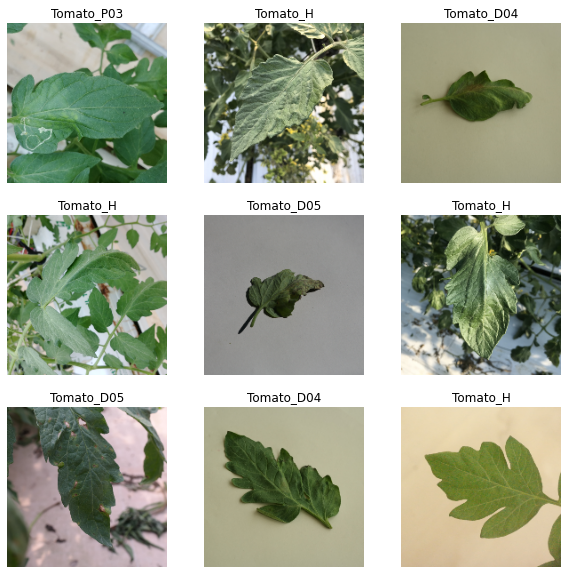

In [15]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [16]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [19]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [22]:
from tensorflow.keras import layers

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [24]:
num_classes = len(class_names)

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)       

In [25]:
epochs = 10
history = model.fit(
    train_ds, validation_data=val_ds, epochs=epochs
)

Epoch 1/10
347/347 [==============================] - 18s 18ms/step - loss: 0.8558 - accuracy: 0.7426 - val_loss: 0.6414 - val_accuracy: 0.8207
Epoch 2/10
347/347 [==============================] - 4s 13ms/step - loss: 0.5841 - accuracy: 0.8205 - val_loss: 0.5967 - val_accuracy: 0.8041
Epoch 3/10
347/347 [==============================] - 4s 13ms/step - loss: 0.4228 - accuracy: 0.8637 - val_loss: 0.5804 - val_accuracy: 0.8160
Epoch 4/10
347/347 [==============================] - 4s 13ms/step - loss: 0.2820 - accuracy: 0.9045 - val_loss: 0.5629 - val_accuracy: 0.8506
Epoch 5/10
347/347 [==============================] - 4s 13ms/step - loss: 0.1723 - accuracy: 0.9404 - val_loss: 0.6396 - val_accuracy: 0.8467
Epoch 6/10
347/347 [==============================] - 4s 13ms/step - loss: 0.0969 - accuracy: 0.9667 - val_loss: 0.7294 - val_accuracy: 0.8467
Epoch 7/10
347/347 [==============================] - 5s 13ms/step - loss: 0.0515 - accuracy: 0.9839 - val_loss: 0.9085 - val_accuracy: 0.844

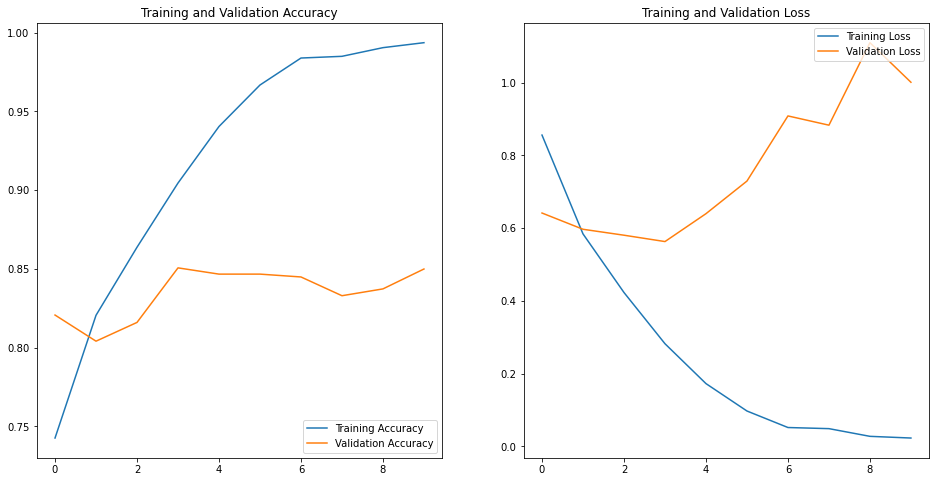

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
data_augmentation = Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal', input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

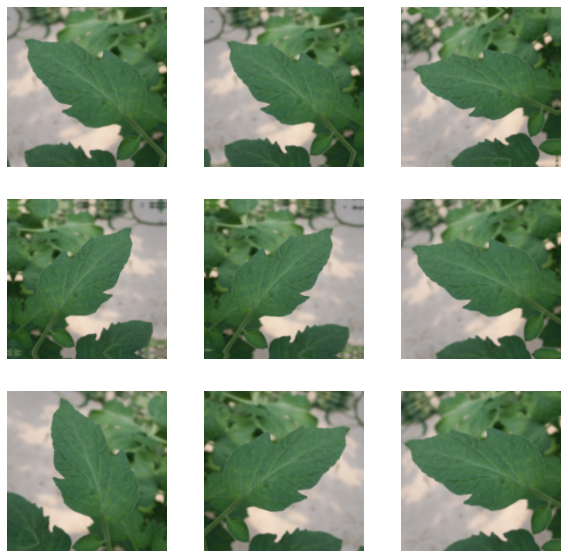

In [30]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis('off')

In [32]:
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 45, 45, 64)       

In [33]:
epochs = 15
history = model.fit(
    train_ds, validation_data=val_ds, epochs=epochs
)

Epoch 1/15
347/347 [==============================] - 6s 15ms/step - loss: 0.8876 - accuracy: 0.7237 - val_loss: 0.7280 - val_accuracy: 0.7911
Epoch 2/15
347/347 [==============================] - 5s 15ms/step - loss: 0.6708 - accuracy: 0.7975 - val_loss: 0.5552 - val_accuracy: 0.8344
Epoch 3/15
347/347 [==============================] - 5s 15ms/step - loss: 0.5662 - accuracy: 0.8231 - val_loss: 0.5056 - val_accuracy: 0.8402
Epoch 4/15
347/347 [==============================] - 5s 15ms/step - loss: 0.4982 - accuracy: 0.8398 - val_loss: 0.4645 - val_accuracy: 0.8564
Epoch 5/15
347/347 [==============================] - 5s 15ms/step - loss: 0.4598 - accuracy: 0.8543 - val_loss: 0.4691 - val_accuracy: 0.8582
Epoch 6/15
347/347 [==============================] - 5s 15ms/step - loss: 0.4154 - accuracy: 0.8661 - val_loss: 0.4467 - val_accuracy: 0.8690
Epoch 7/15
347/347 [==============================] - 5s 15ms/step - loss: 0.3628 - accuracy: 0.8810 - val_loss: 0.3844 - val_accuracy: 0.8806

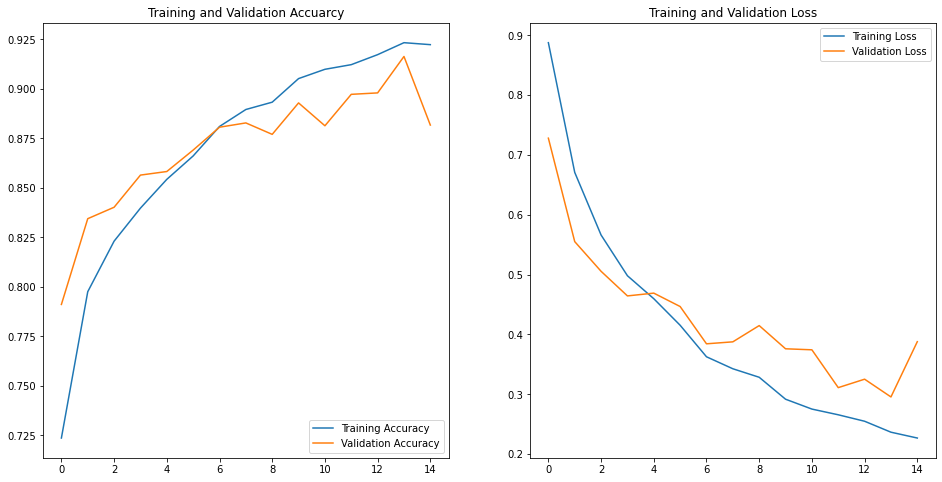

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuarcy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [72]:
data_dir = join(PATH.INPUT, 'test')

img_arrays = []
names = []
for path, name in sorted(list_files(data_dir), key=lambda e: int(''.join(filter(str.isdigit, e[1])))):
    img = keras.preprocessing.image.load_img(path, target_size=(img_height, img_width))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_arrays.append(img_array)
    names.append(name)
img_arrays = np.array(img_arrays)

predictions = model.predict(img_arrays)
predictions = np.argmax(predictions, axis=1)
names, predictions

(['0.png',
  '1.png',
  '2.png',
  '3.png',
  '4.png',
  '5.png',
  '6.png',
  '7.png',
  '8.png',
  '9.png',
  '10.png',
  '11.png',
  '12.png',
  '13.png',
  '14.png',
  '15.png',
  '16.png',
  '17.png',
  '18.png',
  '19.png',
  '20.png',
  '21.png',
  '22.png',
  '23.png',
  '24.png',
  '25.png',
  '26.png',
  '27.png',
  '28.png',
  '29.png',
  '30.png',
  '31.png',
  '32.png',
  '33.png',
  '34.png',
  '35.png',
  '36.png',
  '37.png',
  '38.png',
  '39.png',
  '40.png',
  '41.png',
  '42.png',
  '43.png',
  '44.png',
  '45.png',
  '46.png',
  '47.png',
  '48.png',
  '49.png',
  '50.png',
  '51.png',
  '52.png',
  '53.png',
  '54.png',
  '55.png',
  '56.png',
  '57.png',
  '58.png',
  '59.png',
  '60.png',
  '61.png',
  '62.png',
  '63.png',
  '64.png',
  '65.png',
  '66.png',
  '67.png',
  '68.png',
  '69.png',
  '70.png',
  '71.png',
  '72.png',
  '73.png',
  '74.png',
  '75.png',
  '76.png',
  '77.png',
  '78.png',
  '79.png',
  '80.png',
  '81.png',
  '82.png',
  '83.png',
  

In [76]:
sub = pd.DataFrame({'file_name': names, 'answer': predictions})

In [77]:
sub

,file_name,answer
0,0.png,0
1,1.png,2
2,2.png,6
3,3.png,1
4,4.png,2
...,...,...
3458,3458.png,4
3459,3459.png,6
3460,3460.png,7
3461,3461.png,6


In [78]:
output_path = join(PATH.OUTPUT, 'v1.csv')
sub.to_csv(output_path, index=None)